#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [10]:
first_name= "AmirHossein"
last_name= "Jadidi"
student_number= "402300461"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [11]:
import numpy as np
import pandas as pd

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [12]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
print(type(x_train))
x_train = np.array(x_train).reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
y_train = np.array(y_train).reshape(y_train.shape[0],1)

x_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
y_test = np.array(y_test).reshape(y_test.shape[0],1)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
<class 'numpy.ndarray'>


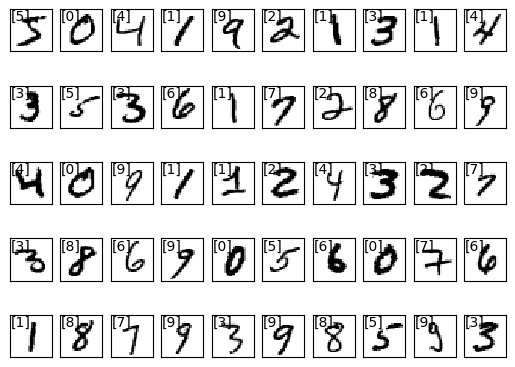

In [13]:
# here show 50 first of this images

from matplotlib import pyplot as plt

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
  X = np.array(X).reshape(X.shape[0],28,28)
  # for i in range(num_images):
  #   # fig, axs = plt.subplots(10)
  #   # fig.suptitle('Vertically stacked subplots')
  #   # axs[i].plot(X[i][1], X[i][1])
  #   # axs[1].plot(x, -y)
  #   plt.subplot(440 + 1 + i)
  #   plt.imshow(X[i], cmap=plt.get_cmap('gray'))
  #   plt.show()
  for i in range(num_images):
    ax = plt.subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

show_images(50,x_train)

In [14]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train_scaled = x_train/x_train.max()


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [15]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
from numpy.linalg import eig
cov_matrix = np.cov(x_train_scaled.T)
eigenvalues, eigenvectors = eig(cov_matrix)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [16]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
sorted_eigenvalues = np.flip(np.sort(eigenvalues))
sorted_eigenvalues_index = np.flip(np.argsort(eigenvalues))
# print(np.argsort(eigenvalues))
sorted_eigenvalues_index_list = []
counter = 0
for k,v in enumerate(sorted_eigenvalues_index):
  counter += eigenvalues[v]
  sorted_eigenvalues_index_list.append(v)
  if counter > explained_variance*(eigenvalues.sum()):
    compression_ratio =  len(sorted_eigenvalues_index) /counter
    break
  else:
    continue

#calculate the compression_ratio
print("number of component to satisfy explained variance " + str(explained_variance)+ ", is = " + str(k))
print("compression ratio is {:.2f}".format(compression_ratio))

number of component to satisfy explained variance 0.8, is = 43
compression ratio is 18.51


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

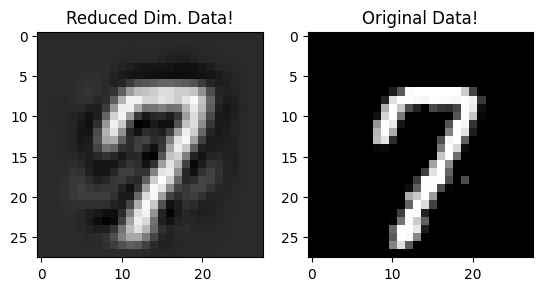

In [17]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

###### choose eigenvectors ######
V = eigenvectors[:,sorted_eigenvalues_index_list]
###### create X ######
F = np.dot(x_train,V)

###### Reproject Images to Standard Basis ######
X_k = np.dot(F,V.T)

X_reconstruct = np.array(X_k).reshape(X_k.shape[0],28,28)

random_sample = np.random.randint(0, len(x_train))
plt.subplot(121)
plt.imshow(X_reconstruct[random_sample,:], cmap=plt.get_cmap('gray'))
plt.title("Reduced Dim. Data!")
plt.subplot(122)
plt.imshow(x_train.reshape(x_train.shape[0],28,28)[random_sample,:], cmap=plt.get_cmap('gray'))
plt.title("Original Data!")
plt.show()

#TODO
#plot the dimentionally reduced data
#plot the original data

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [41]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  data = data/data.max()
  data = data.reshape(data.shape[0], -1)
  cov_matrix = np.cov(data.T)
  eigenvalues, eigenvectors = eig(cov_matrix)
  sorted_eigenvalues = np.flip(np.sort(eigenvalues))
  sorted_eigenvalues_index = np.flip(np.argsort(eigenvalues))
  sorted_eigenvalues_index_list = sorted_eigenvalues_index[0:n_components]
  V = eigenvectors[:,sorted_eigenvalues_index_list]
  data_reduced = np.dot(data,V)
  return data_reduced
  # data_reconstrcted = np.dot(data_reduced,V.T)
  # return data_reconstrcted
  # data_projected = np.array(data_reconstrcted).reshape(data_reconstrcted.shape[0],28,28)
  # return data_projected
  # pass

In [42]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


def ML_model(X, y, print_output=True):
  # train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.3,random_state=0)

  clf = MLPClassifier(solver = 'lbfgs', max_iter=100)
  # clf = LogisticRegression(random_state=0)
  clf.fit(X, y)
  score = clf.score(X, y)
  if print_output:
      print("Accuracy of model is " + str(score * 100))
  return score

  # train = do_pca(10,train)
  # test = do_pca(10,test)

  # names = [
  #     "Nearest Neighbors",
  #     "Linear SVM",
  #     "RBF SVM",
  #     "Gaussian Process",
  #     "Decision Tree",
  #     "Random Forest",
  #     "Neural Net",
  #     "AdaBoost",
  #     "Naive Bayes",
  #     "QDA",
  # ]

  # classifiers = [
  #     KNeighborsClassifier(3),
  #     SVC(kernel="linear", C=50),
  #     SVC(kernel='rbf', gamma=10, C=50),
  #     GaussianProcessClassifier(1.0 * RBF(1.0)),
  #     DecisionTreeClassifier(max_depth=5),
  #     RandomForestClassifier(
  #         max_depth=5, n_estimators=10, max_features=1
  #     ),
  #     MLPClassifier(alpha=1, max_iter=1000),
  #     AdaBoostClassifier(),
  #     GaussianNB(),
  #     QuadraticDiscriminantAnalysis(),
  # ]
      # iterate over classifiers
  # for name, clf in zip(names, classifiers):
  #   print(name)
  #   clf = make_pipeline(StandardScaler(), clf)
  #   clf.fit(train, train_labels)
  #   score = clf.score(test, test_labels)
  #   print(name,score)
      #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO


<div dir=rtl>
در این قسمت از کد
classifier
های مختلف را بررسی کرده که به صورت کامنت در کد آمده است و بهترین
(و البته سریعترین)
 آن را انتخاب کردیم.

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train).reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
y_train = np.array(y_train).reshape(y_train.shape[0],1)
# x_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
# y_test = np.array(y_test).reshape(y_test.shape[0],1)

acc_list, pc_list = [], []
for pc in range(2,101, 2):
  # print(pc)
  pc_list.append(pc)
  x_train_reduced = do_pca(pc, x_train)
  acc_list.append(ML_model(x_train_reduced,y_train))
    #TODO

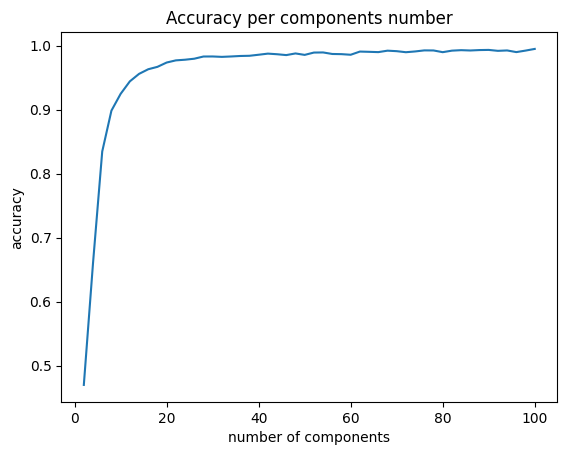

In [47]:
#plot the accuracy based on components.
plt.plot(pc_list,acc_list)
plt.title('Accuracy per components number')
plt.xlabel("number of components")
plt.ylabel("accuracy")
plt.show()
#TODO

In [48]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
print('best accuray is '+ str(max(acc_list)))
best_pc = pc_list[acc_list.index(max(acc_list))]
print('best component is ' + str(best_pc))


best accuray is 0.9949166666666667
best component is 100
